In [2]:
# 加载imdb数据集：
from fakeras.datasets import imdb

(x_train, y_train), (x_test, y_test) \
= imdb.load_data(num_words=10000)

In [3]:
x_train.shape

(25000,)

In [4]:
print(x_train[24999])

[1, 88, 1120, 152, 10, 67, 132, 15, 11, 750, 8880, 716, 209, 362, 6, 12, 42, 8, 189, 42, 35, 9007, 1901, 12, 28, 3572, 86, 108, 4190, 4, 793, 4492, 31, 9, 432, 140, 5, 25, 138, 3, 598, 4, 1610, 42, 21, 1917, 42, 21, 438, 42, 21, 5941, 2, 42, 21, 1217, 42, 40, 3, 8063, 4, 686, 4777, 34, 212, 650, 65, 768, 2, 65, 4639, 946, 369, 5, 27, 1665, 5, 4964, 65, 115, 5763, 1758, 7, 7, 16, 113, 12, 59, 27, 1489, 2288, 15, 1, 716, 2371, 923, 3, 111, 344, 35, 1455, 9896, 94, 3, 4209, 837, 808, 4, 165, 1473, 2, 637, 41, 14, 1981, 14, 146, 1758, 2932, 6882, 744, 419, 155, 6143, 8, 1, 19, 2125, 1030, 7, 7, 2991, 1840, 216, 278, 2, 9, 158, 1173, 98]


In [5]:
y_train.shape

(25000,)

In [6]:
print(y_train[24999])

0


In [7]:
# 将整数索引序列解码成单词序列：
word_index = imdb.get_word_index()
index_word = {i: w for w, i in word_index.items()}
review_decoded = ' '.join(index_word.get(i)
                          for i in x_train[24999])
print(review_decoded)

the most positive thing i can say for this dull witted local comedy production is that it's in fact it's so astonishingly bland that one wonders how many dozens of re writes by it went through to have such a complete of personality it's not witty it's not entertaining it's not insightful and it's not charming it's just a progression of four losers who must change their ways and their attitudes towards women to be allowed to attend their best friend's wedding br br with acting that would be sub par for the local amateur society a plot line so tired it'd make a forty third season of look fresh and jokes about as humorous as watching wedding nonetheless scored ten yes 10 nominations in the film awards recently br br fortunately somebody saw sense and it didn't win any


In [8]:
# 对评论数据进行one-hot编码：
import numpy as np

dtype = 'float16'
def one_hot_encode(docs, dim):
    docs_encoded = np.zeros((len(docs), dim),
                            dtype=dtype)
    for i, doc in enumerate(docs):
        docs_encoded[i, doc] = 1
    return docs_encoded

x_train = one_hot_encode(x_train, dim=10000)
x_test = one_hot_encode(x_test, dim=10000)

y_train = np.asarray(y_train, dtype=dtype)
y_train.resize((25000, 1))
y_test = np.asarray(y_test, dtype=dtype)
y_test.resize((25000, 1))


In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(25000, 10000)
(25000, 1)
(25000, 10000)
(25000, 1)


In [10]:
# 构建网络：
from fakeras import NeuralNetwork
from fakeras.layer import Dense

model = NeuralNetwork()
model.add(Dense(16, 'relu', 'xavier', (10000,)))
model.add(Dense(16, 'relu', 'xavier'))
model.add(Dense(1, 'sigmoid', 'xavier'))

In [11]:
# 编译模型：
model.compile('rmsprop', 'bce', 'bin_acc')

In [12]:
# 留出验证集：
x_val = x_train[:10000]
x_train_part = x_train[10000:]

y_val = y_train[:10000]
y_train_part = y_train[10000:]

In [13]:
# 训练模型：
histories = model.fit(inputs=x_train_part,
                      targets=y_train_part,
                      batch_size=512,
                      epochs=20,
                      lr=0.001,
                      validation_data=(x_val, 
                                       y_val),
                      verbose=True,
                      use_every_sample=True)

Epoch 1/20 - loss: 0.386138 - bin_acc: 0.898667 - loss_val: 0.420057 - bin_acc_val: 0.871300 - time used: 7.422999620437622s.


Epoch 2/20 - loss: 0.258401 - bin_acc: 0.931933 - loss_val: 0.325461 - bin_acc_val: 0.887100 - time used: 7.3040056228637695s.


Epoch 3/20 - loss: 0.201536 - bin_acc: 0.939867 - loss_val: 0.304426 - bin_acc_val: 0.881300 - time used: 7.082003116607666s.


Epoch 4/20 - loss: 0.154103 - bin_acc: 0.955467 - loss_val: 0.291127 - bin_acc_val: 0.887600 - time used: 6.758998870849609s.


Epoch 5/20 - loss: 0.120090 - bin_acc: 0.966733 - loss_val: 0.290313 - bin_acc_val: 0.887800 - time used: 6.88001823425293s.


Epoch 6/20 - loss: 0.095857 - bin_acc: 0.977067 - loss_val: 0.296850 - bin_acc_val: 0.887000 - time used: 6.7069995403289795s.


Epoch 7/20 - loss: 0.082649 - bin_acc: 0.981067 - loss_val: 0.317752 - bin_acc_val: 0.883300 - time used: 6.829004526138306s.


Epoch 8/20 - loss: 0.079005 - bin_acc: 0.979467 - loss_val: 0.359566 - bin_acc_val: 0.874000 - time used: 6.720998764038086s.


Epoch 9/20 - loss: 0.052682 - bin_acc: 0.989600 - loss_val: 0.352229 - bin_acc_val: 0.878600 - time used: 6.7150046825408936s.


Epoch 10/20 - loss: 0.047858 - bin_acc: 0.990067 - loss_val: 0.385127 - bin_acc_val: 0.872900 - time used: 6.88599967956543s.


Epoch 11/20 - loss: 0.034676 - bin_acc: 0.994467 - loss_val: 0.400358 - bin_acc_val: 0.875100 - time used: 7.066000461578369s.


Epoch 12/20 - loss: 0.027463 - bin_acc: 0.995933 - loss_val: 0.428456 - bin_acc_val: 0.873000 - time used: 7.850993871688843s.


Epoch 13/20 - loss: 0.022189 - bin_acc: 0.996733 - loss_val: 0.454613 - bin_acc_val: 0.871700 - time used: 6.719000577926636s.


Epoch 14/20 - loss: 0.030465 - bin_acc: 0.995733 - loss_val: 0.535923 - bin_acc_val: 0.862000 - time used: 6.666004180908203s.


Epoch 15/20 - loss: 0.016267 - bin_acc: 0.998133 - loss_val: 0.512548 - bin_acc_val: 0.866900 - time used: 6.56998348236084s.


Epoch 16/20 - loss: 0.017522 - bin_acc: 0.998067 - loss_val: 0.565079 - bin_acc_val: 0.863400 - time used: 6.66600489616394s.


Epoch 17/20 - loss: 0.017946 - bin_acc: 0.998133 - loss_val: 0.610198 - bin_acc_val: 0.859300 - time used: 7.3129987716674805s.


Epoch 18/20 - loss: 0.011588 - bin_acc: 0.999133 - loss_val: 0.624988 - bin_acc_val: 0.860400 - time used: 6.708003282546997s.


Epoch 19/20 - loss: 0.005505 - bin_acc: 0.999533 - loss_val: 0.646049 - bin_acc_val: 0.863200 - time used: 6.720999240875244s.


Epoch 20/20 - loss: 0.003989 - bin_acc: 0.999667 - loss_val: 0.674830 - bin_acc_val: 0.862700 - time used: 7.6650025844573975s.


In [14]:
# 收集训练指标：
epochs = [histories[i]['epoch'] for i in range(len(histories))]
loss = [histories[i]['loss'] for i in range(len(histories))]
loss_val = [histories[i]['loss_val'] for i in range(len(histories))]
metric = [histories[i]['bin_acc'] for i in range(len(histories))]
metric_val = [histories[i]['bin_acc_val'] for i in range(len(histories))]


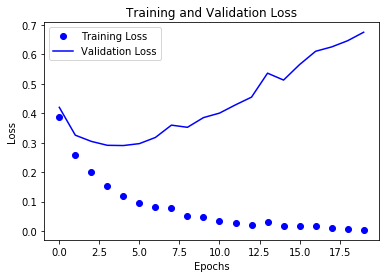

In [15]:

# 绘制训练损失和验证损失：
import matplotlib.pyplot as plt

plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, loss_val, 'b', label="Validation Loss")
plt.legend()

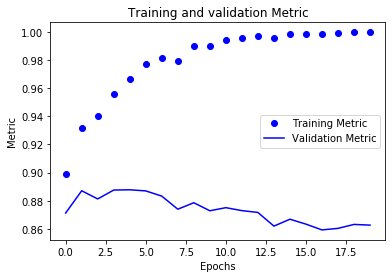

In [16]:
# 绘制训练精度和验证精度：
plt.title("Training and validation Metric")
plt.xlabel("Epochs")
plt.ylabel("Metric")
plt.plot(epochs, metric, 'bo', label="Training Metric")
plt.plot(epochs, metric_val, 'b', label="Validation Metric")
plt.legend()

In [17]:
# 由上面两个图可以看出，在第3轮训练之后产生过拟合，重新训练模型，训练3个epoch：
model = NeuralNetwork()
model.add(Dense(16, 'relu', 'xavier', (10000,)))
model.add(Dense(16, 'relu', 'xavier'))
model.add(Dense(1, 'sigmoid', 'xavier'))
model.compile('rmsprop', 'bce', 'bin_acc')
model.fit(x_train,
          y_train,
          batch_size=512,
          epochs=3,
          lr=0.001,
          verbose=True,
          use_every_sample=True)

Epoch 1/3 - loss: 0.292792 - bin_acc: 0.912760 - time used: 9.79301142692566s.


Epoch 2/3 - loss: 0.203197 - bin_acc: 0.936520 - time used: 9.299002885818481s.


Epoch 3/3 - loss: 0.161268 - bin_acc: 0.951000 - time used: 8.829999923706055s.


[{'epoch': 0,
  'loss': 0.29279175586178835,
  'bin_acc': 0.9127599999999997,
  'time_used': 9.79301142692566},
 {'epoch': 1,
  'loss': 0.20319723846795626,
  'bin_acc': 0.9365199999999988,
  'time_used': 9.299002885818481},
 {'epoch': 2,
  'loss': 0.16126781441768076,
  'bin_acc': 0.9509999999999995,
  'time_used': 8.829999923706055}]

In [33]:
# 使用测试集评估模型：
results = model.evaluate(x_test, y_test)
print(results)

{'loss': 0.2825772379594404, 'metric': 0.8888}
